In [1]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Downloads/heart.csv")

In [3]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

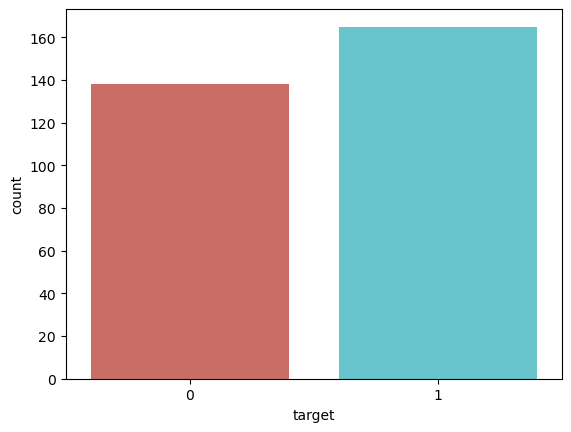

In [9]:
sns.countplot(x='target',data=df,palette='hls')
plt.show()

In [10]:
y = df['target']
x = df.drop('target',axis=1)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_predict = log.predict(x_test)

<Axes: >

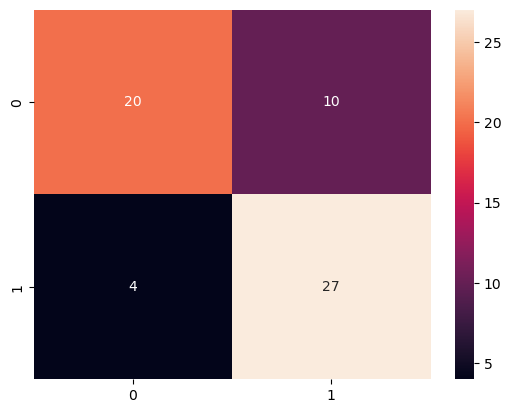

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [15]:
print(cm)

[[20 10]
 [ 4 27]]


In [16]:
#Accuracy
(20+27)/(20+10+4+27)

0.7704918032786885

In [18]:
#precision
27/(27+10)

0.7297297297297297

In [19]:
#Rceall
27/(27+4)

0.8709677419354839

In [17]:
print('Acurracy: %d',log.score(x_test,y_test))

Acurracy: %d 0.7704918032786885


In [ ]:
# roc_auc_score : computes area under the ROC curve
# roc_curve : computes true positive rate (tpr ), false positive rate (fpr) and threshold
# object_name.predict_proba(x_test): returns probability of both the classes (class 0 and class 1)
# [:,1] : select the probabilty of positive class usually label as 1 and are needed to compute roc curve
# 

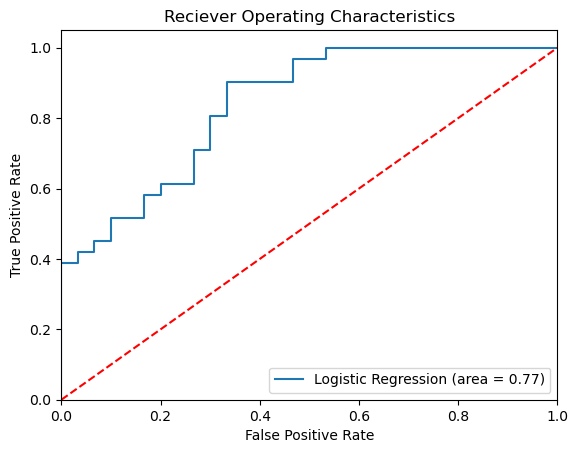

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_curve = roc_auc_score(y_test, y_predict)
fpr,tpr,thresholds = roc_curve(y_test,log.predict_proba(x_test)[:,1])
plt.figure()

plt.plot(fpr,tpr, label='Logistic Regression (area = %0.2f)' % log_curve)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc='lower right')
plt.savefig('Log_Roc')
plt.show()

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [23]:
log.coef_

array([[-4.15244183e-04, -1.74848804e+00,  1.00963405e+00,
        -2.06731986e-02, -2.61885713e-03, -1.62717911e-02,
         7.67600843e-01,  3.74614809e-02, -9.12623515e-01,
        -6.44099934e-01,  1.89181603e-01, -5.99740183e-01,
        -5.00388190e-01]])

In [24]:
log.intercept_

array([0.02146569])